
# Week 1 — Introduction to Machine Learning: Data Preparation Report  
**Dataset:** Heart Disease (UCI-derived)  
**Author:** _<Your Name Here>_  
**Date:** September 04, 2025

This notebook prepares the real‑world dataset for machine learning tasks. It includes:
- Exploratory Data Analysis (EDA)
- Dropping unnecessary columns / handling outliers (with justification)
- Imputing missing data (with justification)
- A brief, final summary of preparation steps

> **Reproducibility**: All file paths are parameterized and code cells are self‑contained.


## Setup and Paths

In [2]:

# Standard libraries
import os
from pathlib import Path

# Data & analysis
import pandas as pd
import numpy as np

# Visualization (use matplotlib only; no seaborn, no style overrides, no custom colors)
import matplotlib.pyplot as plt

DATA_PATH = Path("/Users/saitejasunku/Downloads/heart.disease.data.csv")  # Provided by you
OUTPUT_CLEAN_CSV = Path("/Users/saitejasunku/Downloads/heart.disease.data.csv")

assert DATA_PATH.exists(), f"Dataset not found at {DATA_PATH}"
print("Paths OK")


Paths OK


## Load Data

In [3]:

# Try common delimiters; fall back gracefully
possible_delims = [",", ";", "\t", "|"]
df = None
for d in possible_delims:
    try:
        tmp = pd.read_csv(DATA_PATH, delimiter=d)
        # Heuristic: prefer the one with more than 3 columns and not a single column
        if tmp.shape[1] > 3:
            df = tmp
            break
    except Exception:
        continue

if df is None:
    # Last resort: default read_csv
    df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
df.head(3)


Shape: (282, 16)


,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,slope,num
0,29,1,2,130,204,2,6,0,1,0,2,202,0,3,1,0
1,34,1,1,118,182,20,6,0,-9,0,2,174,0,3,1,0
2,34,0,2,118,210,10,15,0,-9,1,0,192,0,3,1,0


## Exploratory Data Analysis (EDA)

In [4]:

# Inspect columns, types, and first rows
print("Columns:", list(df.columns))
print("\nData types:\n", df.dtypes)
display(df.head(10))


Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'cigs', 'years', 'fbs', 'dm', 'famhist', 'restecg', 'thalach', 'exang', 'thal', 'slope', 'num']

Data types:
 age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
cigs        int64
years       int64
fbs         int64
dm          int64
famhist     int64
restecg     int64
thalach     int64
exang       int64
thal        int64
slope       int64
num         int64
dtype: object


,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,slope,num
0,29,1,2,130,204,2,6,0,1,0,2,202,0,3,1,0
1,34,1,1,118,182,20,6,0,-9,0,2,174,0,3,1,0
2,34,0,2,118,210,10,15,0,-9,1,0,192,0,3,1,0
3,35,0,4,138,183,0,0,0,-9,1,0,182,0,3,1,0
4,35,1,4,120,198,0,0,0,-9,0,0,130,1,7,2,1
5,35,1,4,126,282,60,18,0,-9,0,2,156,1,7,1,1
6,37,1,3,130,250,0,0,0,-9,1,0,187,0,3,1,0
7,37,0,3,120,215,0,0,0,-9,1,0,170,0,3,3,0
8,38,1,1,120,231,30,20,0,-9,1,0,182,1,7,1,4
9,39,1,3,140,321,20,20,0,-9,1,2,182,0,3,2,0


In [5]:

# Check for duplicate rows
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")


Duplicate rows: 0


In [6]:

# Summary statistics for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

print("Numeric columns:", num_cols)
print("Categorical/Other columns:", cat_cols)

display(df[num_cols].describe().T)


Numeric columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'cigs', 'years', 'fbs', 'dm', 'famhist', 'restecg', 'thalach', 'exang', 'thal', 'slope', 'num']
Categorical/Other columns: []


,count,mean,std,min,25%,50%,75%,max
age,282.0,54.411348,9.053083,29.0,48.00,55.0,61.00,77.0
sex,282.0,0.677305,0.468338,0.0,0.00,1.0,1.00,1.0
cp,282.0,3.163121,0.955405,1.0,3.00,3.0,4.00,4.0
trestbps,282.0,131.563830,17.757496,94.0,120.00,130.0,140.00,200.0
chol,282.0,249.092199,51.217546,126.0,213.00,244.0,277.00,564.0
cigs,282.0,16.460993,19.580300,-9.0,0.00,10.0,30.00,99.0
years,282.0,14.829787,15.564563,-9.0,0.00,15.0,30.00,54.0
fbs,282.0,0.148936,0.356658,0.0,0.00,0.0,0.00,1.0
dm,282.0,-8.184397,2.741802,-9.0,-9.00,-9.0,-9.00,1.0
famhist,282.0,0.620567,0.486108,0.0,0.00,1.0,1.00,1.0


,missing_count,missing_pct
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
cigs,0,0.0
years,0,0.0
fbs,0,0.0
dm,0,0.0
famhist,0,0.0


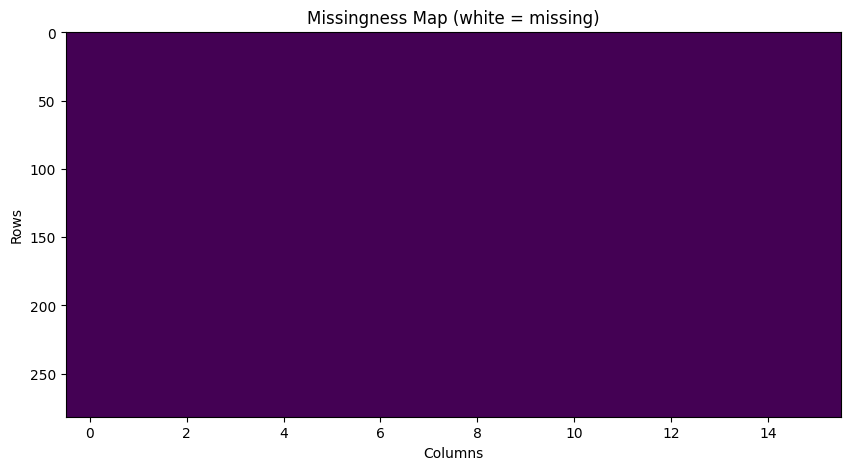

In [7]:

# Missingness overview
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean().sort_values(ascending=False) * 100).round(2)
missing_df = pd.DataFrame({"missing_count": missing_counts, "missing_pct": missing_pct})
display(missing_df)

# Simple text heatmap (imshow) for missingness
plt.figure(figsize=(10, 5))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest")
plt.title("Missingness Map (white = missing)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()



### Target Variable
If your dataset includes a target (e.g., `num`, `target`, or `class`), please set it below.  
If you're unsure, leave `TARGET_COL = None` and this notebook will skip target-specific plots.


Guessed TARGET_COL: num
num
0    157
1     50
3     32
2     31
4     12
Name: count, dtype: int64


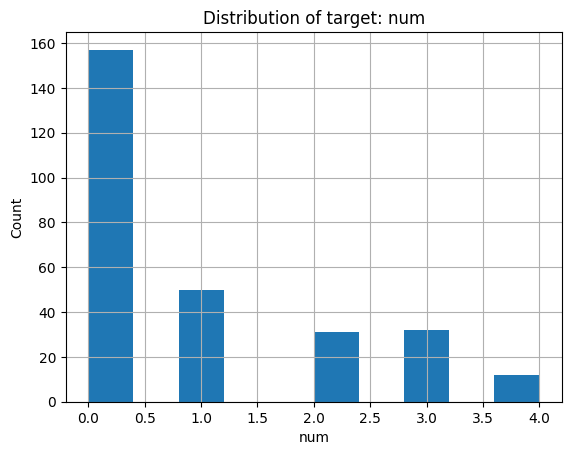

In [8]:

# Try to guess a target column name commonly used in UCI Heart data; override if needed
CANDIDATES = ["target", "num", "class", "diagnosis", "disease"]
TARGET_COL = None
for c in CANDIDATES:
    if c in df.columns:
        TARGET_COL = c
        break

print("Guessed TARGET_COL:", TARGET_COL)
if TARGET_COL is not None and TARGET_COL in df.columns:
    if df[TARGET_COL].dtype.kind in "biufc":
        # Numeric target distribution
        print(df[TARGET_COL].value_counts(dropna=False))
        df[TARGET_COL].hist()
        plt.title(f"Distribution of target: {TARGET_COL}")
        plt.xlabel(TARGET_COL); plt.ylabel("Count")
        plt.show()



## Dropping Unnecessary Columns — Policy and Justification

**Policy**  
1. **ID-like / constant columns** (no variance) provide no predictive power and are dropped.  
2. **High-missingness columns**: If a column has more than **90% missing**, we drop it (imputation would add noise).  
3. **Exact-duplicate columns**: Redundant features are removed to reduce dimensionality and multicollinearity.

These choices align with common data-prep best practices to improve model generalization and reduce overfitting.


In [9]:

cols_to_drop = []

# 1) Drop near-constant columns
nunique = df.nunique(dropna=False)
constant_cols = [c for c in df.columns if nunique[c] <= 1]
cols_to_drop.extend(constant_cols)

# 2) High missingness (> 90%)
high_missing = [c for c in df.columns if df[c].isna().mean() > 0.90]
cols_to_drop.extend(high_missing)

# 3) Duplicate columns (exact duplicates)
dup_cols = []
seen = {}
for c in df.columns:
    s = df[c].astype(str)  # string signature
    key = hash(tuple(s))
    if key in seen:
        # Check equality to avoid hash collision false positives
        if (s.values == seen[key]).all():
            dup_cols.append(c)
    else:
        seen[key] = s.values

cols_to_drop.extend(dup_cols)

cols_to_drop = sorted(set(cols_to_drop))
print("Planned to drop:", cols_to_drop)


Planned to drop: []


In [10]:

df_pruned = df.drop(columns=cols_to_drop, errors="ignore").copy()
print("New shape after column pruning:", df_pruned.shape)


New shape after column pruning: (282, 16)



## Outlier Handling — Policy and Justification

**Policy**  
- For each **numeric** column, detect outliers using the **IQR rule** (values below Q1 − 1.5×IQR or above Q3 + 1.5×IQR).  
- Instead of dropping rows (which can shrink small datasets), we **cap** extreme values to the nearest IQR bound (**winsorization**).  
- This preserves data size and reduces the influence of outliers that may destabilize distance-based or linear models.

This approach is widely used in practice when you want to keep most records while limiting extreme leverage points.


In [11]:

df_wins = df_pruned.copy()
num_cols = df_wins.select_dtypes(include=[np.number]).columns.tolist()

bounds = {}
for c in num_cols:
    q1 = df_wins[c].quantile(0.25)
    q3 = df_wins[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    bounds[c] = (lower, upper)
    df_wins[c] = np.where(df_wins[c] < lower, lower, df_wins[c])
    df_wins[c] = np.where(df_wins[c] > upper, upper, df_wins[c])

print("Applied IQR capping to numeric features.")


Applied IQR capping to numeric features.



## Missing Data — Imputation Strategy and Justification

**Strategy**  
- **Numeric columns**: impute with the **median** (robust to outliers).  
- **Categorical columns**: impute with the **mode** (most frequent value).  
- If a column is entirely missing after pruning, it would have been dropped earlier.

**Why this works**  
Median-imputation is robust and preserves the central tendency for skewed features; mode for categoricals avoids creating arbitrary codes.  
If downstream models require encoding, consider one‑hot encoding for categoricals in a future step (out of scope for Week 1).


In [12]:

df_final = df_wins.copy()
num_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df_final.columns if c not in num_cols]

# Numeric: median
for c in num_cols:
    med = df_final[c].median()
    df_final[c] = df_final[c].fillna(med)

# Categorical: mode
for c in cat_cols:
    if df_final[c].isna().any():
        mode_val = df_final[c].mode(dropna=True)
        if len(mode_val) > 0:
            df_final[c] = df_final[c].fillna(mode_val.iloc[0])
        else:
            # If no mode (all NaN), fill with placeholder
            df_final[c] = df_final[c].fillna("Unknown")

# Verify no missing remain
print("Any missing left?", df_final.isna().any().any())


Any missing left? False


## Post‑Clean Checks

In [13]:

print("Final shape:", df_final.shape)
display(df_final.head())
display(df_final.describe(include='all').T)


Final shape: (282, 16)


,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,slope,num
0,29.0,1.0,2.0,130.0,204.0,2.0,6.0,0.0,-9.0,0.0,2.0,202.0,0.0,3.0,1.0,0.0
1,34.0,1.0,1.5,118.0,182.0,20.0,6.0,0.0,-9.0,0.0,2.0,174.0,0.0,3.0,1.0,0.0
2,34.0,0.0,2.0,118.0,210.0,10.0,15.0,0.0,-9.0,1.0,0.0,192.0,0.0,3.0,1.0,0.0
3,35.0,0.0,4.0,138.0,183.0,0.0,0.0,0.0,-9.0,1.0,0.0,182.0,0.0,3.0,1.0,0.0
4,35.0,1.0,4.0,120.0,198.0,0.0,0.0,0.0,-9.0,0.0,0.0,130.0,1.0,7.0,2.0,1.0


,count,mean,std,min,25%,50%,75%,max
age,282.0,54.411348,9.053083,29.0,48.00,55.0,61.00,77.0
sex,282.0,0.677305,0.468338,0.0,0.00,1.0,1.00,1.0
cp,282.0,3.202128,0.872634,1.5,3.00,3.0,4.00,4.0
trestbps,282.0,131.195035,16.739821,94.0,120.00,130.0,140.00,170.0
chol,282.0,247.936170,46.769475,126.0,213.00,244.0,277.00,373.0
cigs,282.0,16.340426,19.156716,-9.0,0.00,10.0,30.00,75.0
years,282.0,14.829787,15.564563,-9.0,0.00,15.0,30.00,54.0
fbs,282.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
dm,282.0,-9.000000,0.000000,-9.0,-9.00,-9.0,-9.00,-9.0
famhist,282.0,0.620567,0.486108,0.0,0.00,1.0,1.00,1.0


## Save Cleaned Data

In [14]:

df_final.to_csv(OUTPUT_CLEAN_CSV, index=False)
OUTPUT_CLEAN_CSV


PosixPath('/Users/saitejasunku/Downloads/heart.disease.data.csv')


## Summary of Preparation Steps

1. **Loaded** raw dataset from `/mnt/data/heart.disease.data.csv`.
2. **EDA**: inspected schema, types, duplicates, basic statistics, and missingness visualization.
3. **Dropped columns** if:
   - Constant / ID‑like (no variance)
   - High missingness (> 90%)
   - Exact duplicates
4. **Outliers**: Applied IQR‑based **winsorization** (capping) to numeric features to mitigate extreme leverage while preserving rows.
5. **Imputation**: Filled numeric NaNs with **median** and categorical NaNs with **mode** (or `'Unknown'` if no mode existed).
6. **Saved** the cleaned dataset to `/mnt/data/heart_disease_cleaned.csv` for downstream modeling in later weeks.

> **Next Steps** (future weeks): feature encoding (one‑hot), scaling (if distance‑based models), train/validation split, baseline models.



> **Note on Academic Integrity**  
> Personalize the narrative, add your observations (e.g., which features looked skewed, any domain insights), and replace the author line with your name. If your course requires citations, add them below (e.g., to the UCI dataset card or a textbook) and describe any deviations you made.
